C:\Users\New Mastermind\AppData\Local\Temp\ipykernel_7588\2215483684.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\New Mastermind\AppData\Local\Temp\ipykernel_7588\2215483684.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 


✅ Model Evaluation:
Accuracy: 0.8699186991869918
Confusion Matrix:
 [[26 12]
 [ 4 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        38
           1       0.87      0.95      0.91        85

    accuracy                           0.87       123
   macro avg       0.87      0.82      0.84       123
weighted avg       0.87      0.87      0.87       123



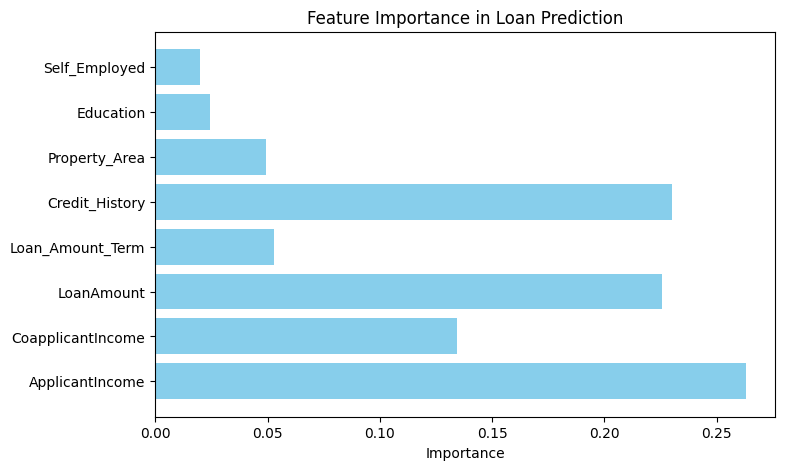

✅ Loan Approved for sample input

✅ Model and Encoders saved successfully!


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import joblib

# ==========================
# 1. Load Dataset
# ==========================
file_path = "loan.csv"
df = pd.read_csv(file_path)

# Select relevant columns
selected_cols = [
    "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
    "Loan_Amount_Term", "Credit_History",
    "Property_Area", "Education", "Self_Employed", "Loan_Status"
]
df = df[selected_cols].copy()

# ==========================
# 2. Handle Missing Values
# ==========================
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# ==========================
# 3. Encode Categorical Columns
# ==========================
encoders = {}
for col in ["Property_Area", "Education", "Self_Employed", "Loan_Status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # store encoder for later use

# ==========================
# 4. Features & Target
# ==========================
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================
# 5. Train Model
# ==========================
rf = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=42
)
rf.fit(X_train, y_train)

# ==========================
# 6. Evaluate Model
# ==========================
y_pred = rf.predict(X_test)

print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==========================
# 7. Feature Importance
# ==========================
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance in Loan Prediction")
plt.show()

# ==========================
# 8. Manual Test with Input
# ==========================
sample_input = {
    "ApplicantIncome": 4000,
    "CoapplicantIncome": 1500,
    "LoanAmount": 120,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": "Urban",
    "Education": "Graduate",
    "Self_Employed": "No"
}

# Convert to DataFrame
input_df = pd.DataFrame([sample_input])

# Apply encoders for categorical features
for col in ["Property_Area", "Education", "Self_Employed"]:
    input_df[col] = encoders[col].transform(input_df[col])

# Predict loan approval
prediction = rf.predict(input_df)[0]

if prediction == 1:
    print("✅ Loan Approved for sample input")
else:
    print("❌ Loan Rejected for sample input")

# ==========================
# 9. Save Model & Encoders
# ==========================
joblib.dump(rf, "loan_model.pkl")
joblib.dump(encoders, "loan_encoders.pkl")

print("\n✅ Model and Encoders saved successfully!")


In [3]:
# ==========================
# Manual Test with Input
# ==========================
sample_input = {
    "ApplicantIncome": 4000,
    "CoapplicantIncome": 1500,
    "LoanAmount": 120,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": "Urban",
    "Education": "Graduate",
    "Self_Employed": "No"
}

# Convert input to DataFrame
input_df = pd.DataFrame([sample_input])

# Apply encoders (only for categorical cols)
for col in ["Property_Area", "Education", "Self_Employed"]:
    input_df[col] = encoders[col].transform(input_df[col])

# Prediction
prediction = rf.predict(input_df)[0]

# Show result
if prediction == 1:
    print("✅ Loan Approved")
else:
    print("❌ Loan Rejected")


✅ Loan Approved


✅ Model and Encoders saved successfully!
